# Orbitrap Astral DIA (OADIA) - MS2 Windows

In [24]:
# import public packages
import pandas as pd
import os

# !pip install pydiaid
import pydiaid.oadia.method_generator as method_creator
import pydiaid.oadia.method_evaluation as method_evaluator

from IPython.display import Image

# # importing components for visualization
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load a proteomics library

In [25]:
import pydiaid.loader as loader

library_name = "/Users/patriciaskowronek/Documents/pydiaid/pydiaid/oadia/static/AlphaPept_results.csv"
analysis_software = "AlphaPept"
ptm = "None" #Options: 'None', 'Phospho', 'DiGly', ["STY"]

In [26]:
library = loader.load_library(
        library_name,
        analysis_software,
        ptm,
        False
    )
library

,mz,Charge,Proteins,Peptide,IM
2,367.231672,2.0,sp|Q13151|ROA0_HUMAN,LFVGGLK_2,0.726023
3,845.962927,2.0,sp|Q13151|ROA0_HUMAN,LFIGGLNVQTSESGLR_2,1.102190
4,572.594492,3.0,sp|Q13151|ROA0_HUMAN,GFGFVYFQNHDAADK_3,0.824195
5,858.396483,2.0,sp|Q13151|ROA0_HUMAN,GFGFVYFQNHDAADK_2,1.134147
6,726.683059,3.0,sp|Q13151|ROA0_HUMAN,GDVAEGDLIEHFSQFGTVEK_3,0.974275
...,...,...,...,...,...
20087,918.139958,3.0,sp|P22612|KAPCG_HUMAN,DLKPENLLIDQQGYLQVTDFGFAK_3,1.017018
20088,1402.736600,2.0,sp|Q9NRK6|ABCBA_HUMAN,ILLLDEATSALDAENEYLVQEALDR_2,1.454452
20089,725.884070,2.0,sp|Q96JS3|PGBD1_HUMAN,NVSLEVTVQEMRcCVFGVLLLSGFoxMR_2,1.011275
20090,970.487625,3.0,sp|Q8IZL2|MAML2_HUMAN,FPTGTPAAYTPNQSLQQAVGSQQFSQR_3,1.224723


## Define where the output should be saved

In [27]:
import pydiaid.synchropasef.method_creator as syP_method_creator
folder_path = "/Users/patriciaskowronek/Documents/test_folder" # where generated files will be stored
syP_method_creator.create_folder([folder_path])

## Create histogram of precursors in m/z

  charge state of precursors  ratio [%]
0                          1       0.91
1                          2      77.69
2                          3      20.19
3                          4       1.19


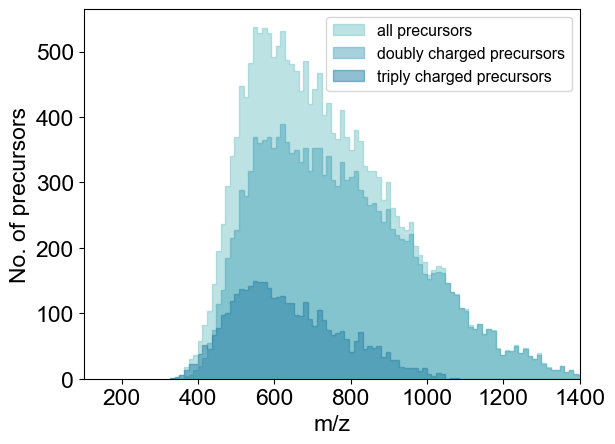

In [28]:
import pydiaid.synchropasef.method_evaluator as syP_method_evaluator
import pydiaid.synchropasef.plots as syP_plots

plot_parameters = {
    "plot_mz": [100, 1400],
}

syP_plots.plot_precursor_distribution_as_histogram(
        library,
        plot_parameters,
        os.path.join(
            folder_path,
            'Histogram_precursor_distribution_in_library.png'
        ),
        gui=True
    ),

dict_charge_of_precursor = syP_method_evaluator.calculate_percentage_multiple_charged_precursors(library)
mult_charged_precursor_info = pd.DataFrame(
    {
        "charge state of precursors": list(dict_charge_of_precursor.keys()),
        "ratio [%]": list(dict_charge_of_precursor.values())
    }
)
mult_charged_precursor_info.to_csv(
    os.path.join(
        folder_path,
        'percentage_of_multiple_charged_precursors.csv'
    ),
    index=False
)
print(mult_charged_precursor_info)

## Specify method parameters

In [47]:
mz_values = library["mz"]
mz_range = (380, 980)
num_bins = 25
window_type = "dynamic" # fixed or dynamic
output_format = "all" #targeted, center_mass, mz_ranges

min_width = 1.0
max_width = 40.0

method_evaluator.calculate_precursor_within_scan_area(
    library,
    mz_range,
)

{'precursors within m/z-range [%]': 86.82}

## Generate method

In [48]:
df_window, bins = method_creator.create_method(
    mz_values,
    mz_range,
    num_bins,
    window_type,
    output_format,
    folder_path,
    min_width,
    max_width,
    adjusted_for_forbidden_zones = True,
    # phospho_method = True
)
bins

bins [[380, 462.7369595110334], [462.7369595110334, 491.57876869984375], [491.57876869984375, 513.2536525148734], [513.2536525148734, 532.2615027382413], [532.2615027382413, 549.253787726606], [549.253787726606, 564.3362691645294], [564.3362691645294, 579.830105546174], [579.830105546174, 595.8254202985592], [595.8254202985592, 612.6598869616327], [612.6598869616327, 628.8451651967605], [628.8451651967605, 645.8754027577681], [645.8754027577681, 663.6163658014656], [663.6163658014656, 681.3588175687477], [681.3588175687477, 700.7832344795081], [700.7832344795081, 718.8682261714384], [718.8682261714384, 738.8265176982775], [738.8265176982775, 760.0078274298925], [760.0078274298925, 781.4242200964857], [781.4242200964857, 804.4108183602938], [804.4108183602938, 826.9382957299883], [826.9382957299883, 851.8939679826307], [851.8939679826307, 879.1184771606322], [879.1184771606322, 908.4638041763232], [908.4638041763232, 942.4453532877792], [942.4453532877792, 980]]
oversized bin indices [0

[[380, 420.44099500000004],
 [420.44099500000004, 460.45918500000005],
 [460.45918500000005, 490.47282750000005],
 [490.47282750000005, 513.48328675],
 [513.48328675, 533.49238175],
 [533.49238175, 550.5001125],
 [550.5001125, 566.5073885],
 [566.5073885, 583.51511925],
 [583.51511925, 600.5228500000001],
 [600.5228500000001, 617.53058075],
 [617.53058075, 634.5383115000001],
 [634.5383115000001, 652.546497],
 [652.546497, 671.55513725],
 [671.55513725, 690.5637775],
 [690.5637775, 710.5728725],
 [710.5728725, 730.5819675],
 [730.5819675, 752.591972],
 [752.591972, 774.6019765000001],
 [774.6019765000001, 797.61243575],
 [797.61243575, 821.6233497500001],
 [821.6233497500001, 846.6347185000001],
 [846.6347185000001, 874.6474515000001],
 [874.6474515000001, 904.661094],
 [904.661094, 940.6774650000001],
 [940.6774650000001, 980]]

## Load and Evaluate method

In [49]:
df_window, bins, df_method = method_evaluator.load_method_file(f"{folder_path}/OA_DIA_method_{mz_range[0]}_{mz_range[1]}_{num_bins}_{window_type}"+"_mz_ranges.csv")
df_method

,m/z range
0,380.0000000-420.4409950
1,420.4409950-460.4591850
2,460.4591850-490.4728275
3,490.4728275-513.4832868
4,513.4832868-533.4923818
5,533.4923818-550.5001125
6,550.5001125-566.5073885
7,566.5073885-583.5151192
8,583.5151192-600.5228500
9,600.5228500-617.5305808


In [50]:
# Get statistics with detailed analysis
stats = method_evaluator.analyze_bins(bins, mz_values)

# Print summary
print("Summary Statistics:")
print(f"Number of bins: {stats['num_bins']}")
print(f"Min width: {stats['min_width']:.2f}")
print(f"Max width: {stats['max_width']:.2f}")
print(f"Average width: {stats['avg_width']:.2f}")
print(f"Min items per bin: {stats['min_count']}")
print(f"Max items per bin: {stats['max_count']}")
print(f"Average items per bin: {stats['avg_count']:.2f}")

# Print detailed tabular view
print("\n" + stats['tabular_stats'])

Summary Statistics:
Number of bins: 25
Min width: 16.01
Max width: 40.44
Average width: 24.00
Min items per bin: 171
Max items per bin: 758
Average items per bin: 694.48

Bin statistics:
Bin | Range                     | Width    | Items   | Width OK
---------------------------------------------------------------------------
  0 | 380.0- 420.4            |  40.44 |   171 | True
  1 | 420.4- 460.5            |  40.02 |   487 | True
  2 | 460.5- 490.5            |  30.01 |   705 | True
  3 | 490.5- 513.5            |  23.01 |   736 | True
  4 | 513.5- 533.5            |  20.01 |   739 | True
  5 | 533.5- 550.5            |  17.01 |   701 | True
  6 | 550.5- 566.5            |  16.01 |   735 | True
  7 | 566.5- 583.5            |  17.01 |   758 | True
  8 | 583.5- 600.5            |  17.01 |   704 | True
  9 | 600.5- 617.5            |  17.01 |   743 | True
 10 | 617.5- 634.5            |  17.01 |   717 | True
 11 | 634.5- 652.5            |  18.01 |   718 | True
 12 | 652.5- 671.6       

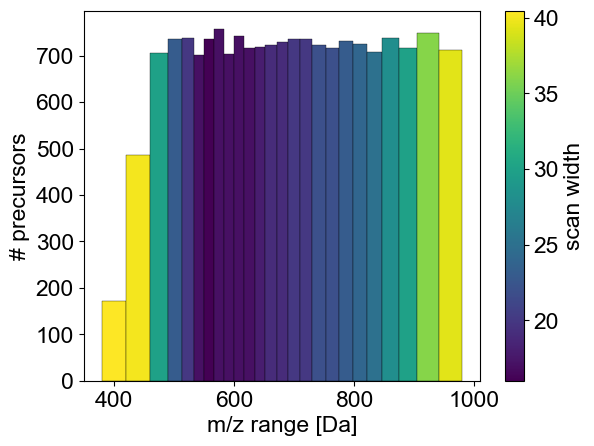

<Figure size 640x480 with 0 Axes>

In [51]:
df_window = method_evaluator.parse_stats_text(stats['tabular_stats'])

# Determine window type
window_type = "fixed" if stats['max_width']-stats['min_width']<2 else "dynamic"

method_evaluator.plot_precursors_per_scan(
    window_type,
    df_window, 
    os.path.join(
        folder_path,
        'precursor_per_scan.png'
    ),
        gui=True
)
method_evaluator.plot_precursors_per_scan(
    window_type,
    df_window, 
    os.path.join(
        folder_path,
        'precursor_per_scan.pdf'
    ),
)